<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


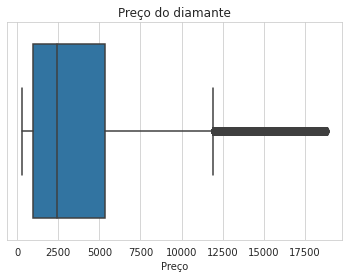

In [8]:
# gráfico do exercício 1

diamonds = data[['cut','price']]

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["price"])
  grafico.set(title='Preço do diamante', xlabel='Preço');


**Insight do gráfico 1**: Ao analisar o gráfico boxplot podemos ver que a maioria dos diamantes tem preço que varia de 1000 a 5500 (Quartis), havendo alguns outliers acima do 12000.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [54]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


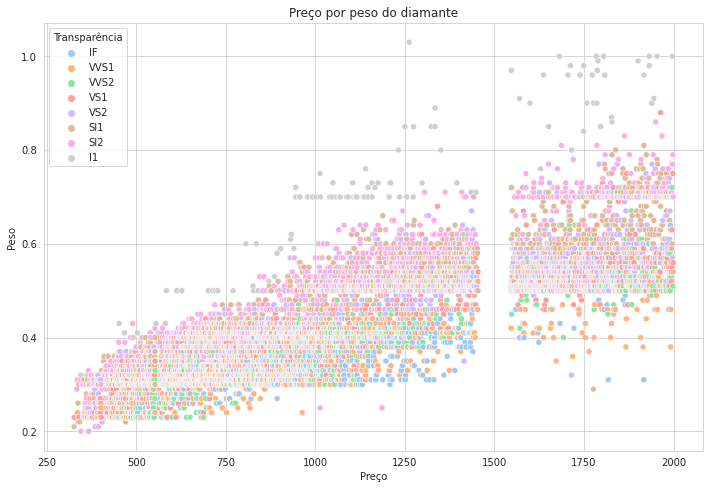

In [58]:
# gráfico do exercício 2

diamonds = data[['price','carat','clarity']]
diamonds = diamonds.query('price < 2000')

with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=diamonds, x="price", y="carat", hue="clarity", palette="pastel")
  grafico.set(title='Preço por peso do diamante', xlabel='Preço', ylabel='Peso');
  grafico.get_legend().set_title("Transparência");
  grafico.figure.set_size_inches(w=30/2.54, h=20/2.54)

**Insight do gráfico 2**: Através do gráfico é possivel ver uma correlação entre preço e peso, onde quanto mais pesado é o diamante, maior o seu peso, sendo possível ver o crescimento através do agrupamento por transparência.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [65]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


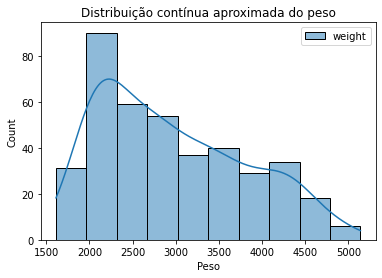

In [67]:
# gráfico do exercício 3

cars = data[['weight']]

grafico = sns.histplot(data=cars, kde=True)
grafico.set(title='Distribuição contínua aproximada do peso', xlabel='Peso');

**Insight do gráfico 3**: Através da análise do gráfico podemos ver que há uma maior quantidade de carros com um peso entre 2000 e 3000, sendo 2000 o peso que mais se destaca dos demais.

---